In [1]:
# normalize Fitness: L (upper bound) - Best Known (Lower Bound)
# normalize LB: Theoretical Minimum (lower bound) - Best Known (Upper Bound)
# average over all instances
# plot LB + Fitness

In [2]:
import csv

def load_data(bounds, best_known):
    data = dict()
    with open(bounds) as bounds_file:
        bounds_data = csv.reader(bounds_file, delimiter=';')
        for row in bounds_data:
            if row[0] not in data:
                data[row[0]] = dict()
            data[row[0]]['lb'] = int(row[1])
            data[row[0]]['ub'] = int(row[2])
    with open(best_known) as best_known_file:
        best_known_data = csv.reader(best_known_file, delimiter=';')
        for row in best_known_data:
            if row[0] not in data:
                data[row[0]] = dict()
            data[row[0]]['f'] = float(row[1])
    return data

In [3]:
data = load_data('bounds.txt', 'best_known_curated.txt')

In [4]:
#data

In [5]:
def normalize(x, lb, ub):
    if lb == ub:
        return 1.0
    return (x - lb) / (ub - lb)

In [6]:
import pandas as pd
exact_path = r'C:\Users\huda\Downloads\results'#r'/home/dhu/Downloads/results'
exact_files = ['results_cplex_cp.txt', 'results_cplex_lp_rewritten.txt', 'results_gurobi.txt', 'results_hexaly_rewritten.txt', 'results_ortools.txt']
all = []
for file in exact_files:
    file_content = pd.read_csv(exact_path + '/' + file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    content_data = pd.DataFrame(file_content)
    all.append(content_data)
results = dict()
results['cplex_cp'] = all[0]
results['cplex_lp'] = all[1]
results['gurobi'] = all[2]
results['hexaly'] = all[3]
results['ortools'] = all[4]
p = r'C:\Users\huda\Downloads\all\all\fjssp_w\results_gurobi.txt'
for file in exact_files:
    file_content = pd.read_csv(p, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    content_data = pd.DataFrame(file_content)
    results['gurobi'] = content_data
# TODO: add GA

In [7]:
ga_path = r'/home/dhu/Downloads/ga_results/converted/results_ga_best.txt'
file_content = pd.read_csv(ga_path, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
data_content = pd.DataFrame(file_content)
all.append(data_content)
#results['ga'] = data_content

FileNotFoundError: [Errno 2] No such file or directory: '/home/dhu/Downloads/ga_results/converted/results_ga_best.txt'

In [8]:
results['hexaly']

,name,optimization_status,fitness_value,lower_bound,runtime,result_vector1,result_vector2,result_vector3,peak_cpu,peak_ram,resource_history,best_result_history
0,0_BehnkeGeiger_10_workers.fjs,-1,159,105,1200,"[72, 98, 118, 133, 149, 62, 78, 88, 99, 118, 1...","[2, 5, 14, 5, 17, 3, 5, 5, 6, 17, 3, 16, 16, 6...","[11, 25, 11, 16, 19, 22, 10, 3, 28, 14, 4, 11,...",0.0,0.0,"[(0, 0), (34.4, 24.1), (48.3, 24.0), (41.9, 24...","[(0, inf, -inf), (1, 2926, 75), (2, 1262, 75),..."
1,0_BehnkeGeiger_11_workers.fjs,-1,483,200,1200,"[134, 191, 214, 240, 346, 87, 116, 130, 214, 3...","[2, 16, 8, 13, 20, 4, 13, 16, 15, 18, 1, 5, 9,...","[2, 18, 21, 17, 10, 14, 22, 20, 17, 22, 9, 28,...",0.0,0.0,"[(0, 0), (39.3, 24.2), (49.9, 24.2), (48.7, 24...","[(0, inf, -inf), (1, 7357, 72), (2, 7357, 72),..."
2,0_BehnkeGeiger_12_workers.fjs,-1,518,194,1200,"[234, 253, 298, 353, 363, 147, 194, 229, 289, ...","[1, 8, 9, 12, 17, 3, 11, 7, 10, 20, 1, 6, 7, 1...","[16, 25, 22, 27, 3, 7, 18, 1, 13, 26, 20, 29, ...",0.0,0.0,"[(0, 0), (37.4, 24.1), (50.3, 24.1), (48.9, 24...","[(0, inf, -inf), (1, 7351, 71), (2, 7351, 71),..."
3,0_BehnkeGeiger_13_workers.fjs,-1,572,203,1200,"[66, 103, 115, 305, 316, 54, 74, 104, 253, 310...","[3, 16, 5, 9, 20, 2, 7, 13, 15, 17, 3, 9, 9, 1...","[11, 27, 2, 27, 24, 30, 10, 23, 4, 15, 5, 3, 1...",0.0,0.0,"[(0, 0), (37.5, 24.2), (50.3, 24.2), (36.4, 24...","[(0, inf, -inf), (1, 0, 76), (2, 7392, 76), (3..."
4,0_BehnkeGeiger_14_workers.fjs,-1,491,199,1200,"[357, 384, 408, 431, 453, 286, 344, 361, 407, ...","[1, 9, 10, 15, 18, 1, 15, 8, 13, 18, 1, 6, 13,...","[23, 28, 29, 18, 22, 11, 28, 21, 22, 12, 12, 1...",0.0,0.0,"[(0, 0), (37.2, 24.1), (50.6, 24.1), (45.1, 24...","[(0, inf, -inf), (1, 7329, 82), (2, 7329, 82),..."
...,...,...,...,...,...,...,...,...,...,...,...,...
397,6_Fattahi_5_workers.fjs,-1,117,106,1200,"[0, 55, 20, 93, 0, 55]","[2, 1, 1, 2, 1, 2]","[3, 3, 2, 2, 2, 2]",0.0,0.0,"[(0, 0), (29.6, 25.1), (62.4, 24.9), (56.3, 24...","[(0, inf, -inf), (1, 117, 96), (2, 117, 106), ..."
398,6_Fattahi_6_workers.fjs,1,305,305,0,"[0, 48, 87, 18, 87, 231, 0, 55, 220]","[1, 1, 2, 1, 1, 3, 2, 3, 2]","[4, 4, 1, 2, 4, 4, 3, 2, 2]",0.0,0.0,"[(0, 0)]","[(0, inf, -inf)]"
399,6_Fattahi_7_workers.fjs,1,386,386,0,"[0, 113, 240, 0, 162, 264, 0, 79, 156]","[2, 2, 4, 3, 3, 5, 1, 4, 5]","[2, 1, 2, 5, 6, 7, 1, 7, 7]",0.0,0.0,"[(0, 0)]","[(0, inf, -inf)]"
400,6_Fattahi_8_workers.fjs,-1,240,215,1200,"[27, 53, 80, 0, 27, 79, 27, 80, 148]","[2, 2, 4, 1, 4, 3, 1, 2, 3]","[3, 2, 4, 3, 4, 6, 1, 3, 2]",0.0,0.0,"[(0, 0), (31.5, 25.0), (67.5, 24.7), (57.5, 24...","[(0, inf, -inf), (1, 248, 210), (2, 240, 215),..."


In [9]:
def normalize_history(history, bounds):
    result = []
    m = max([d[1] for d in history])
    for i in range(len(history)):
    #for data in history:
        #f = normalize(data[1], bounds['f'], bounds['ub'])
        #lb = normalize(data[2], bounds['lb'], bounds['f'])
        if history[i][1] == float('inf'):
            history[i] = (history[i][0], bounds['ub'], history[i][2])
            #history[i] = (history[i][0], history[i+1][0], history[i][2]) if i+1 < len(history) else (history[i][0], 1.0, history[i][2])
            #data = (data[0], m, data[2])
        if history[i][2] == -float('inf'):
            history[i] = (history[i][0], history[i][1], bounds['lb'])
            #history[i] = (history[i][0], history[i][1], history[i+1][2]) if i+1 < len(history) else (history[i][0], history[i][1], 0.0)
            #data = (data[0], data[0], 0)
        f = normalize(history[i][1], bounds['lb'], bounds['ub'])
        lb = normalize(history[i][2], bounds['lb'], bounds['ub'])
        result.append([history[i][0], f, lb])
    return result

In [ ]:
def trim_ga_data(history, bounds):
    history = history.replace('inf', 'float("inf")') # NOTE: should not be necessary for GA
    data = eval(history)
    data = [d for d in data if d > 0]
    time_step = 1200 / len(data)
    result = []
    prev = -1
    for i in range(len(data)):
        if data[i] != prev:
            result.append((time_step * i, data[i], bounds['lb']))
    return data

In [10]:
normalized_data = dict()
for solver in results.keys():
    #if solver == 'gurobi':
    #    continue # TODO: use other gurobi file + re-parse GA results
    normalized_data[solver] = dict()
    for index, row in results[solver].iterrows():
        if row['name'].startswith('Error'):
            continue
        name = row['name'].split('_')
        name = ''.join(name[1:-1])
        history = row['best_result_history']
        history = history.replace('inf', 'float("inf")')
        history = eval(history)
        normalized = normalize_history(history, data[name])
        normalized_data[solver][name] = normalized
        if solver == 'ga':
            print(f'{solver}-{name}: {normalized}')

In [11]:
#normalized_data

In [12]:
def get_values_at_time(data, time): # note: should be modified binary search
    result = data[-1]
    i = 0
    while i < len(data) and data[i][0] <= time:
        result = data[i]
        i+=1
    return result

def get_all_timestamps(data, instance):
    timestamps = dict()
    for solver in data:
        timestamps[solver] = []
        if instance in data[solver]:
            timestamps[solver] = [data[solver][instance][i][0] for i in range(len(data[solver][instance]))]
        timestamps[solver].sort()# just to make sure
    return timestamps

def get_timestamps_all_instances(data):
    instances = list(data['cplex_cp'].keys())
    result = dict()
    for solver in data:
        result[solver] = dict()
        for instance in instances:
            result[solver][instance] = get_all_timestamps(data, instance)
    return result

In [13]:
normalized_data.keys()

dict_keys(['cplex_cp', 'cplex_lp', 'gurobi', 'hexaly', 'ortools'])

In [14]:
timestamps = get_timestamps_all_instances(normalized_data)

In [15]:
def get_average_timelines(data, timestamps):
    instances = list(data['cplex_cp'].keys())
    result = dict()
    for solver in data:
        result[solver] = dict()
        for instance in instances:
            print(f'Processing: {instance}')
            result[solver][instance] = []
            times = timestamps[solver][instance]
            for timestamp in times[solver]:
                f = 0
                lb = 0
                count = 0
                for inner_solver in data:
                    if instance in data[inner_solver]:
                        values = get_values_at_time(data[inner_solver][instance], timestamp)
                        if values[1] != float('inf') and values[2] != -float('inf'):
                            f += values[1] # TODO: double check order
                            lb += values[2]
                            count += 1
                if count > 0:
                    f = float(f)/float(count)
                    lb = float(lb)/float(count)
                else:
                    f = float('inf')
                    lb = -float('inf')
                result[solver][instance].append([timestamp, f, lb])
    return result

def get_timestamps(timestamps, solver):
    data = timestamps[solver]
    times = []
    for instance in data:
        times.extend(data[instance][solver])
    times = list(set(times))
    times.sort()
    #if 1200 not in times:
    #    times.append(1200)
    return times

def get_average_timelines_test(data, timestamps):
    results = dict()
    for solver in data:
        results[solver] = []
        times = get_timestamps(timestamps, solver)
        instances = data[solver]
        for time in times:
            results[solver].append([time, 0.0, 0.0])
            count = 0
            for instance in instances:
                values = get_values_at_time(instances[instance], time)
                if values[1] == float('inf'):
                    values[1] = 1.0#bounds[instance]['ub']
                if values[2] == -float('inf'):
                    values[2] = 0.0#bounds[instance]['lb']
                # fitness = Horizon, lower bound = minimal makespan
                if values[1] != float('inf') and values[2] != -float('inf'):
                    results[solver][-1][1] += values[1]
                    results[solver][-1][2] += values[2]
                    count += 1
            if count > 0:
                results[solver][-1][1] = float(results[solver][-1][1])/float(count)
                results[solver][-1][2] = float(results[solver][-1][2])/float(count)
            else:
                results[solver][-1][1] = 1.0#average_ub#bounds[instance]['ub']#float('inf')
                results[solver][-1][2] = 0.0#average_lb
    return results
        

In [16]:
timelines = get_average_timelines_test(normalized_data, timestamps)

In [17]:
#timelines = get_average_timelines(normalized_data, timestamps)

In [18]:
#timelines

In [19]:
timelines['cplex_cp'][-1]

[1199.79, 0.04911194547495695, 0.0030265088839057912]

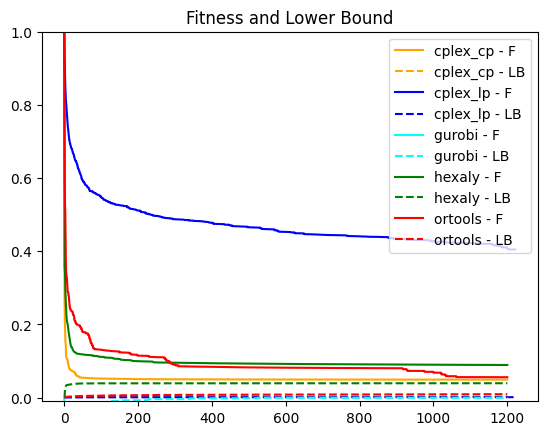

In [20]:
import matplotlib.pyplot as plt
figure = plt.figure()
colors = {'cplex_cp': 'orange', 'cplex_lp': 'blue', 'hexaly': 'green', 'ortools': 'red', 'gurobi': 'cyan'}
for solver in timelines:
    t = [x[0] for x in timelines[solver]]
    f = [x[1] for x in timelines[solver]]
    lb = [x[2] for x in timelines[solver]]
    plt.plot(t, f, label=f'{solver} - F', linestyle='solid', c=colors[solver])
    plt.plot(t, lb, label=f'{solver} - LB', linestyle='dashed', c=colors[solver])
plt.title('Fitness and Lower Bound')
plt.ylim(-0.01, 1.0)
#plt.yscale('log')
plt.legend()
plt.show()

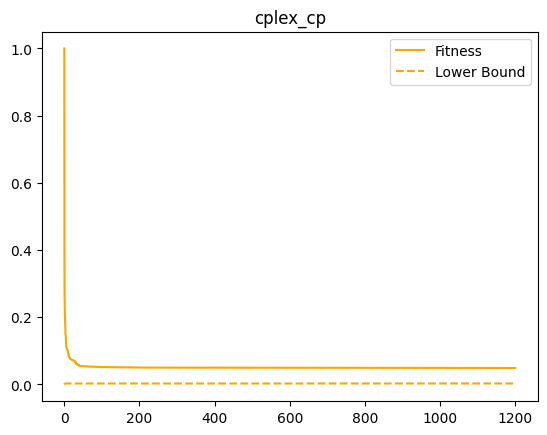

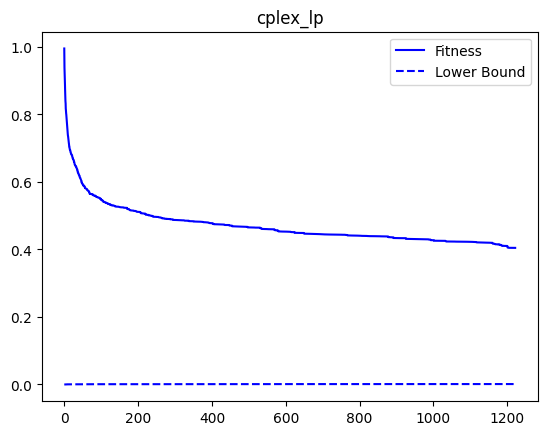

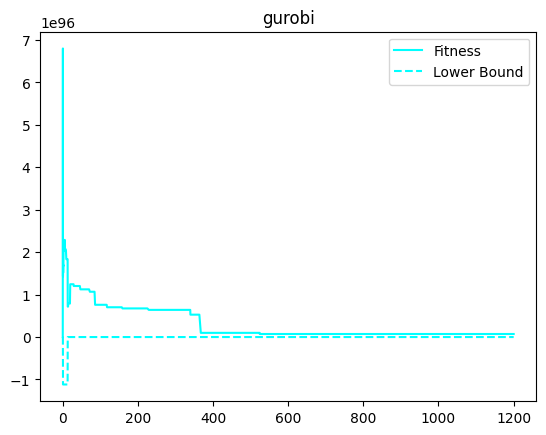

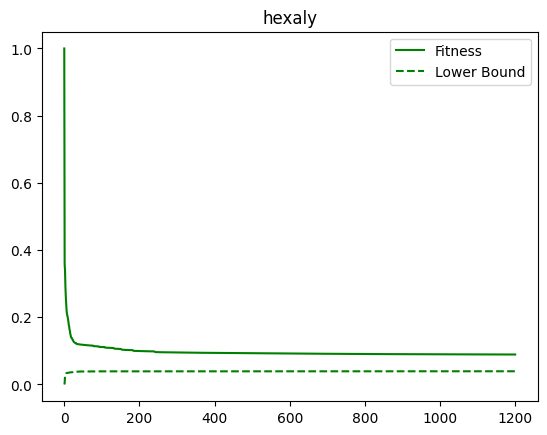

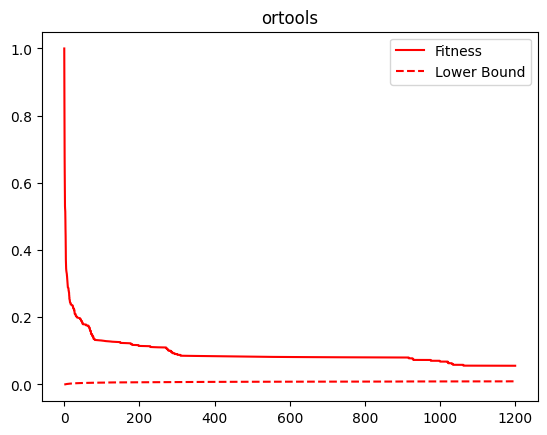

In [26]:
import matplotlib.pyplot as plt
figure = plt.figure()
colors = {'cplex_cp': 'orange', 'cplex_lp': 'blue', 'hexaly': 'green', 'ortools': 'red', 'gurobi': 'cyan'}
for solver in timelines:
    t = [x[0] for x in timelines[solver]]
    f = [x[1] for x in timelines[solver]]
    lb = [x[2] for x in timelines[solver]]
    plt.plot(t, f, label=f'Fitness', linestyle='solid', c=colors[solver])
    plt.plot(t, lb, label=f'Lower Bound', linestyle='dashed', c=colors[solver])
    plt.title(solver)
    #plt.ylim(-0.01, 0.2)
    plt.legend()
    plt.show()

<Figure size 5000x1500 with 0 Axes>

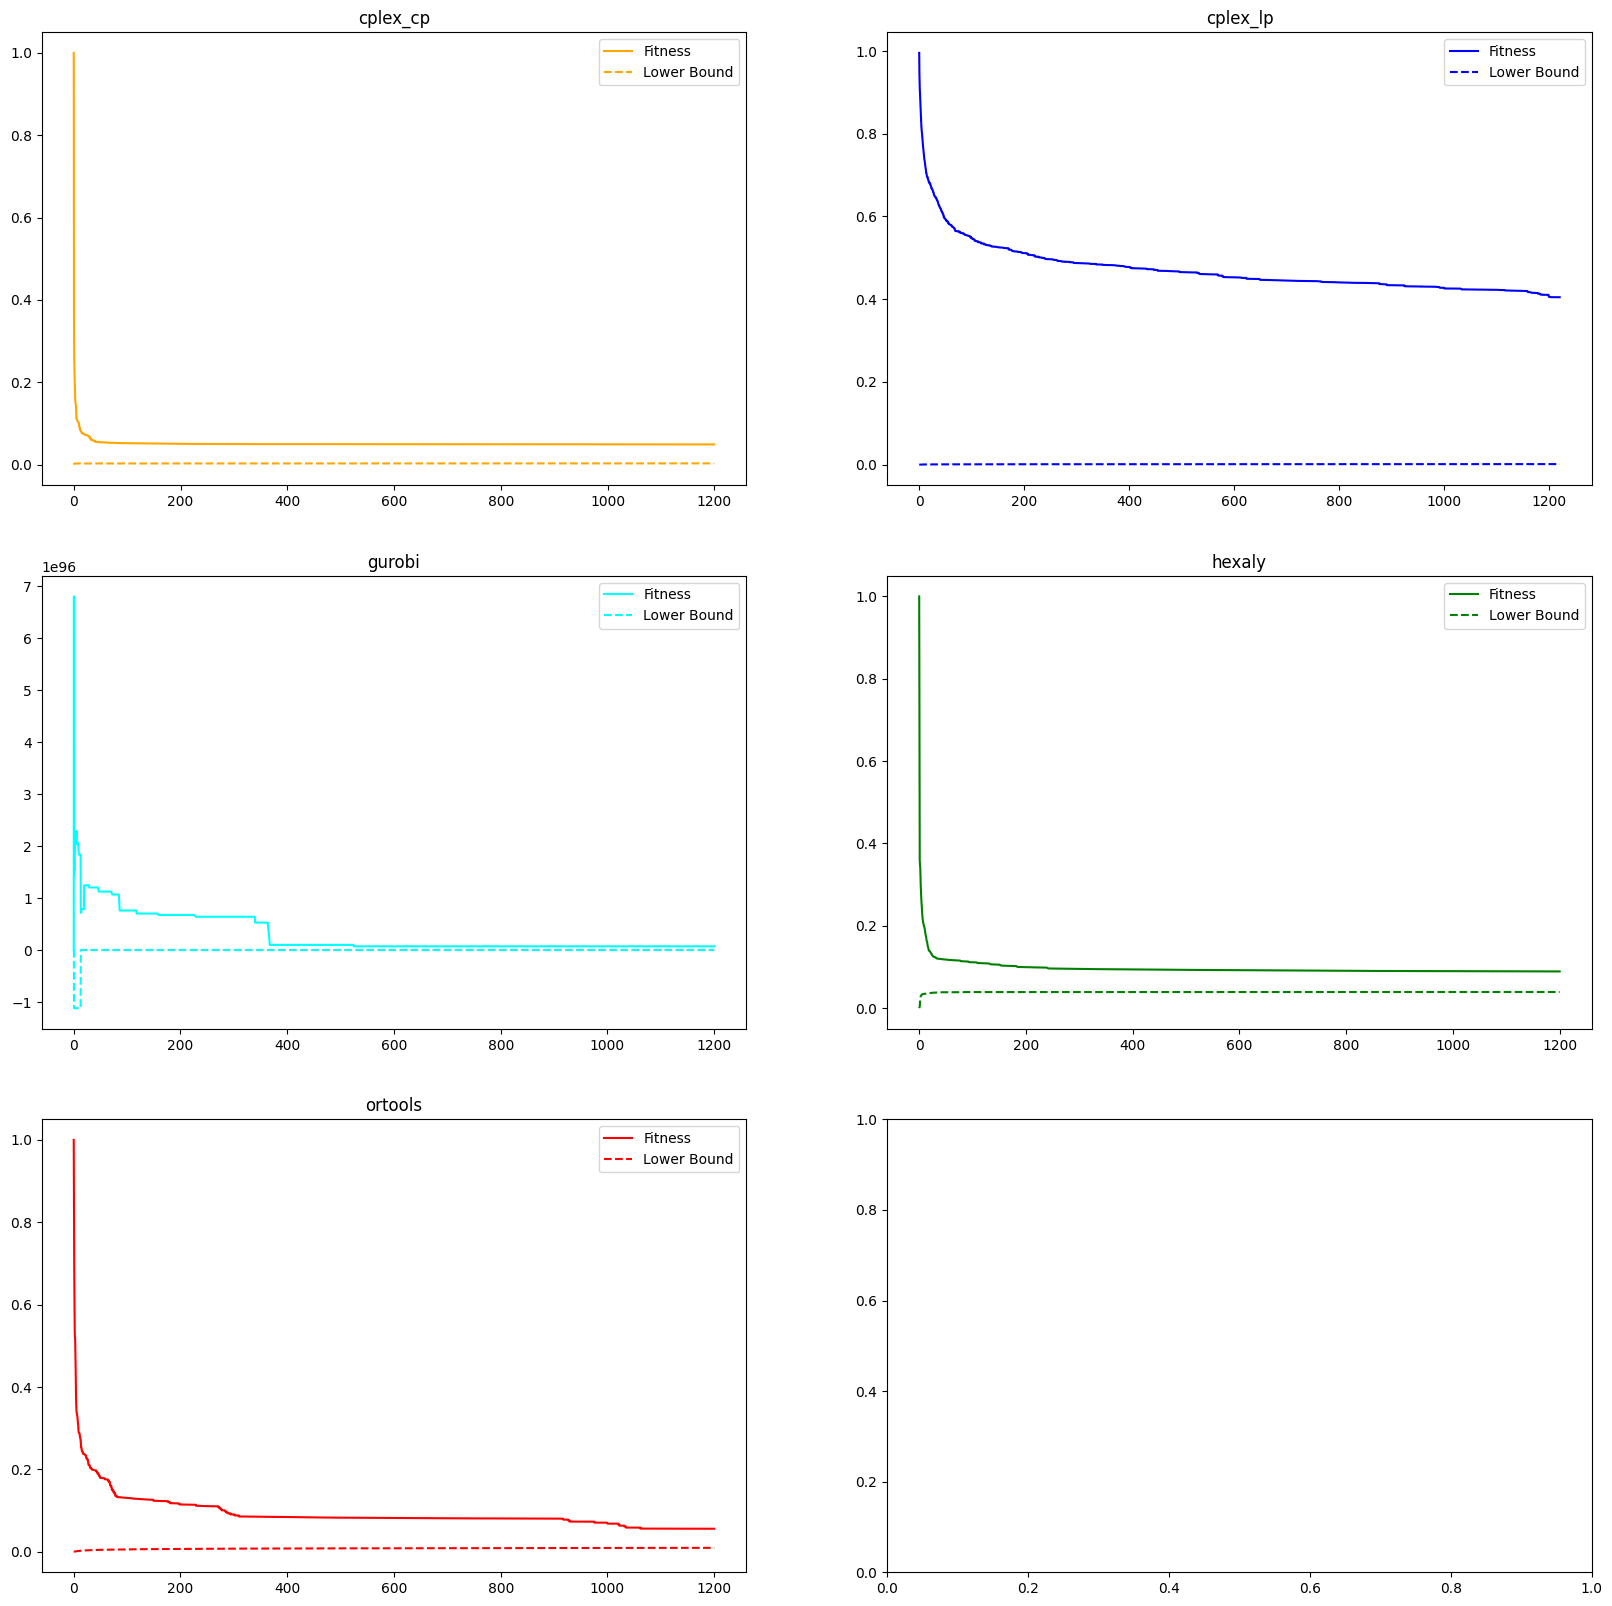

In [22]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(50,15))
colors = {'cplex_cp': 'orange', 'cplex_lp': 'blue', 'hexaly': 'green', 'ortools': 'red', 'gurobi': 'cyan'}
fig = plt.figure(figsize=(20,20))
(a, b), (c,d), (e, f) = fig.subplots(3, 2)
ax = [a, b, c, d, e, f]
i = 0
for solver in timelines:
    t = [x[0] for x in timelines[solver]]
    f = [x[1] for x in timelines[solver]]
    lb = [x[2] for x in timelines[solver]]
    ax[i].plot(t, f, label=f'Fitness', linestyle='solid', c=colors[solver])
    ax[i].plot(t, lb, label=f'Lower Bound', linestyle='dashed', c=colors[solver])
    ax[i].set_title(solver)
    #ax[i].set_ylim(-0.01, 0.5)
    ax[i].legend()
    i+= 1
    #plt.plot(t, f, label=f'Fitness', linestyle='solid', c=colors[solver])
    #plt.plot(t, lb, label=f'Lower Bound', linestyle='dashed', c=colors[solver])
    #plt.title(solver)
    #plt.legend()
plt.show()

In [23]:
#timestamps

In [24]:
"""output = []
for instance in timelines:
    output.append(f'{instance};{timelines[instance]}\n')"""

"output = []\nfor instance in timelines:\n    output.append(f'{instance};{timelines[instance]}\n')"

In [25]:
"""with open('timelines.txt', 'a') as f:
    f.writelines(output)"""

"with open('timelines.txt', 'a') as f:\n    f.writelines(output)"